<a href="https://colab.research.google.com/github/Cl8D/SSUML/blob/main/Project%201%20-%20fashion_mnist_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#데이터 가져오기

train = pd.read_csv('/content/drive/My Drive/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/My Drive/fashion-mnist_test.csv')

print("train data: ", train.shape)
print("test data: ", test.shape)

x_train = train.drop(['label'], axis=1).values.astype('float32') #레이블 제외한 값
y_train = train['label'].values.astype('int32') #레이블만
x_test = test.drop(['label'], axis=1).values.astype('float32')
y_test = test['label'].values.astype('int32') 


#0~1 사이의 실수값이 되도록 나누기 + 28x28로 reshape 하기
x_train = x_train.reshape(x_train.shape[0], 28, 28) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28) / 255.0


train data:  (60000, 785)
test data:  (10000, 785)


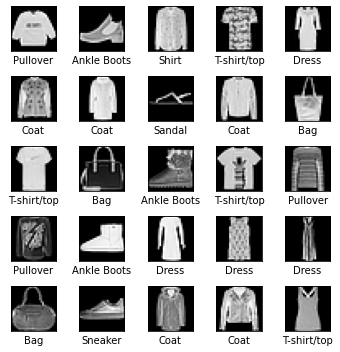

In [ ]:
#데이터 시각화하기
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boots']

plt.figure(figsize = (5,5))
for i in range(25) :
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([]) 
  plt.imshow(x_train[i], cmap = 'gray')
  plt.tight_layout()
  plt.xlabel(class_names[y_train[i]])


In [ ]:
#28x28x1로 reshape하기
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) 

#validation 데이터 나눠주기
#test set 구성비율, stratify: class 비율을 유지해줌.  
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train, random_state = 34)

print('train set:', x_train.shape[0])
print('validation set:', x_val.shape[0])
print('test set:' , x_test.shape[0])

train set: 48000
validation set: 12000
test set: 10000


In [ ]:
#모델 만들기 - 시퀀스 모델을 사용해 CNN 모델 만들기
model = keras.Sequential()

model.add(keras.Input(shape = (28, 28, 1)))
model.add(layers.Conv2D(64, 2, strides = 1, padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3)) #Dropout
model.add(layers.MaxPooling2D(pool_size=2, padding = 'same')) #Max pooling

model.add(layers.Conv2D(32, 2, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=2, padding = 'same'))

model.add(layers.Flatten()) # 이미지를 1차원으로 만들어 주기
model.add(layers.Dense(200, activation='relu'))
#마지막 레이어는 softmax 함수를 통해 10가지 종류의 확률값을 구해줌 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 32)       

In [ ]:
#모델 컴파일하기
model.compile(optimizer = tf.optimizers.Adam(),  #Adam을 이용해서 최적화
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy']) #정확도 평가

In [ ]:
#모델 학습시키기
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_val, y_val))

Epoch 1/10
750/750 [==============================] - 100s 134ms/step - loss: 0.4927 - accuracy: 0.8263 - val_loss: 0.5358 - val_accuracy: 0.8476
Epoch 2/10
750/750 [==============================] - 100s 134ms/step - loss: 0.3453 - accuracy: 0.8736 - val_loss: 0.5239 - val_accuracy: 0.8220
Epoch 3/10
750/750 [==============================] - 100s 133ms/step - loss: 0.3120 - accuracy: 0.8861 - val_loss: 0.4252 - val_accuracy: 0.8808
Epoch 4/10
750/750 [==============================] - 100s 133ms/step - loss: 0.2840 - accuracy: 0.8945 - val_loss: 0.4566 - val_accuracy: 0.8597
Epoch 5/10
750/750 [==============================] - 100s 133ms/step - loss: 0.2688 - accuracy: 0.9010 - val_loss: 0.4128 - val_accuracy: 0.8760
Epoch 6/10
750/750 [==============================] - 100s 133ms/step - loss: 0.2555 - accuracy: 0.9062 - val_loss: 0.3948 - val_accuracy: 0.8838
Epoch 7/10
750/750 [==============================] - 100s 133ms/step - loss: 0.2397 - accuracy: 0.9103 - val_loss: 0.3707 -

In [ ]:
#테스트 데이터 넣어보기
score = model.evaluate(x_test, y_test)
print('test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.3186 - accuracy: 0.9059
test accuracy: 0.9059000015258789


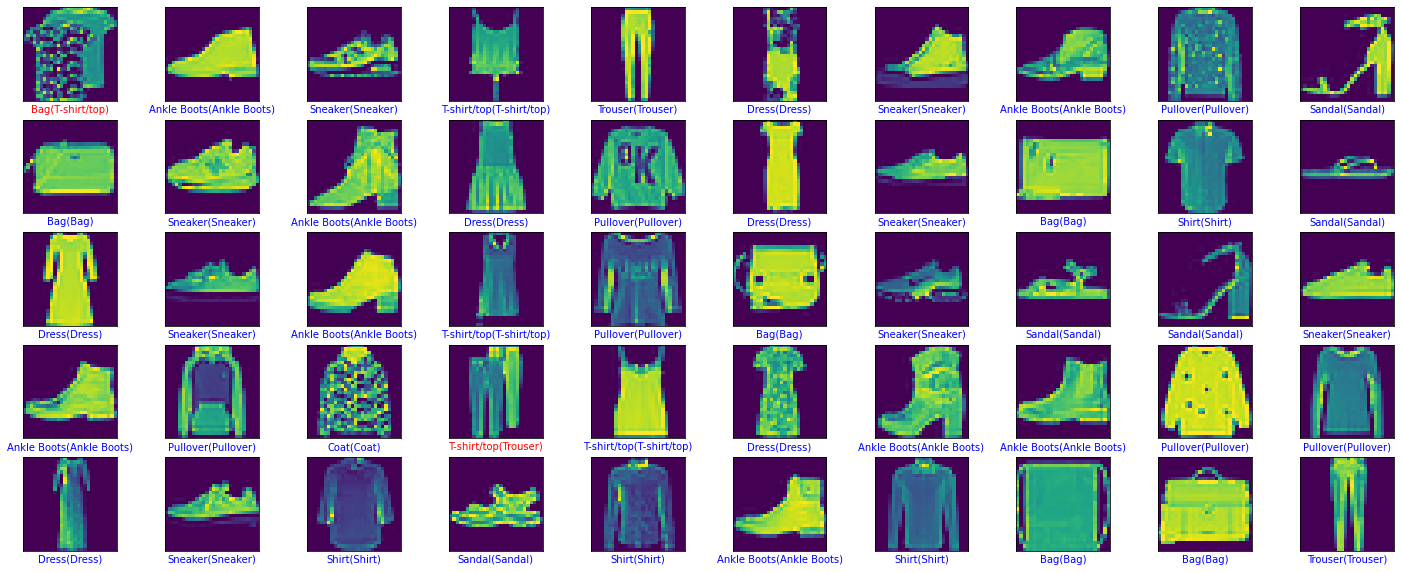

In [ ]:
#예측값 시각화하기
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(25, 10))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=50, replace = False)):
    plt.subplot(5, 10, i+1)
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    plt.xlabel(class_names[predict_index] + '(' + class_names[true_index] + ')',
               color = "blue" if predict_index == true_index else "red")
   